In [1]:
import os
os.chdir('../..')

In [2]:
from platform import python_version

print(python_version())

3.7.9


In [34]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

import seaborn as sns
sns.set_style("whitegrid")

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [79]:
dataset = 'LPMC_DAG'

names = ['FULL_01', 'FULL_02', 'FULL_03', 'FULL_04', 'FULL_05',
         'FULL_01_old', 'FULL_02_old', 'FULL_03_old', 'FULL_04_old', 'FULL_05_old', 
         'LINEAR_01', 'LINEAR_02', 'LINEAR_03', 'LINEAR_04', 'LINEAR_05', 
        ]

In [80]:
pal = sns.color_palette("rainbow", len(names))
#pal = pal[::-1]
sns.set_palette(pal)
pal

[(0.37450980392156863, 0.19584546700716696, 0.9951469164070644),
 (0.24901960784313726, 0.38410574917192586, 0.9806347704689777),
 (0.12352941176470589, 0.5574894393428855, 0.9566044195004408),
 (0.0019607843137254832, 0.7092813076058535, 0.9232891061054894),
 (0.12745098039215685, 0.8336023852211195, 0.8810121942857845),
 (0.2529411764705882, 0.9256376597815562, 0.8301840308155507),
 (0.3784313725490196, 0.9818225628535369, 0.7712979623471807),
 (0.503921568627451, 0.9999810273487268, 0.7049255469061472),
 (0.6294117647058823, 0.9794097676013659, 0.631711006253251),
 (0.7549019607843137, 0.9209055179449537, 0.5523649729605058),
 (0.8803921568627451, 0.8267341748257635, 0.4676575928925868),
 (1.0, 0.7005430375932911, 0.37841105004231035),
 (1.0, 0.5472195469221114, 0.28549158627534216),
 (1.0, 0.37270199199091436, 0.18980109344182594),
 (1.0, 0.18374951781657037, 0.09226835946330202)]

Text(0, 0.5, 'loss')

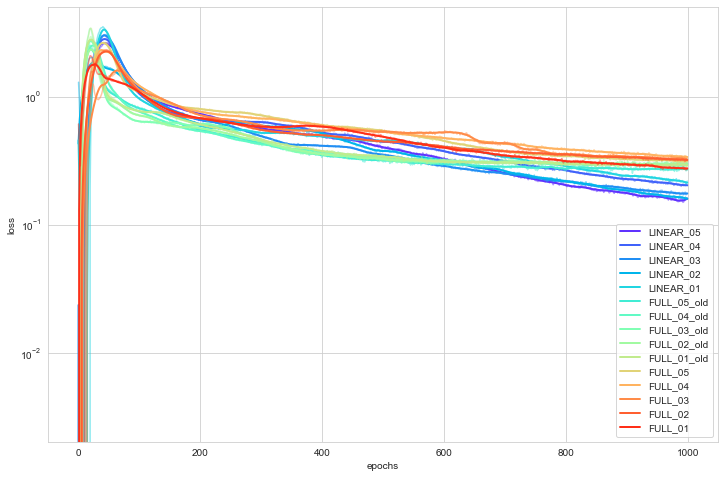

In [82]:
plt.figure(figsize=(12,8))

for n in names[::-1]:
    
    output_folder = '../output/' + dataset + '/' + n + '/'

    with open(output_folder + 'logs/stats.json', 'r') as infile:
        data = json.load(infile)

    loss = []
    for d in data:
        loss.append(max(0, -d['GAN_loss/d_loss']))
        
    p = plt.semilogy(loss, alpha=0.5)
    c = p[0].get_color()
    
    try:
        yhat = savgol_filter(loss, 51, 3) # window size 51, polynomial order 3
        plt.semilogy(yhat, color=c, linewidth=2, label=n)
    except:
        pass
    
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
for n in names:
    
    output_folder = '../output/' + dataset + '/' + n + '/'

    with open(output_folder + 'logs/stats.json', 'r') as infile:
        data = json.load(infile)

    loss = {'gen': [],
            'discr': [],
            'kl': []
           }
    if any(x in n for x in ('WGANGP','WGGP')) :
        loss['wgan_discr'] = []
        loss['grad_pen'] = []
        loss['kl'] = []
        loss['wgan_gen'] = []
        for d in data:
            loss['wgan_gen'].append(d['GAN_loss/g_loss'])
            loss['kl'].append(d['GAN_loss/kl_div'])
            loss['gen'].append(d['GAN_loss/g_loss']+d['GAN_loss/kl_div'])
            loss['wgan_discr'].append(d['GAN_loss/d_loss'])
            loss['grad_pen'].append(10*d['GAN_loss/gradient_penalty'])
            loss['discr'].append((d['GAN_loss/d_loss']+10*d['GAN_loss/gradient_penalty']))
    else:
        for d in data:
            loss['kl'].append(d['GAN_loss/kl_div'])
            loss['gen'].append(d['GAN_loss/g_loss'])#+d['GAN_loss/kl_div'])
            loss['discr'].append(d['GAN_loss/d_loss'])

    plt.figure(figsize=(10,7))
    if True:
        plt.plot(loss['gen'], 'k', label='Generator')
        #plt.plot(loss['kl'], 'k--', label='KL div', alpha=0.5)
        if any(x in n for x in ('WGANGP','WGGP')) :
            plt.plot(loss['kl'], 'k--', label='KL div', alpha=0.5)
            plt.plot(loss['wgan_gen'], 'k:', label='WGAN gen loss', alpha=0.5)
            
    plt.plot(loss['discr'], 'r', label='Discriminator')
    if any(x in n for x in ('WGANGP','WGGP')) :
        plt.plot(loss['grad_pen'], 'r--', label='Grad. pen.', alpha=0.5)
        plt.plot(loss['wgan_discr'], 'r:', label='WGAN discr loss', alpha=0.5)
    plt.legend()

    plt.title(n)
    plt.ylim([-5, 5])
    #plt.xlim([-5, 300])
    plt.xlabel('epochs')
    plt.ylabel('loss')